In [134]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

from sklearn import neighbors, datasets

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

%matplotlib inline


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

Assignment 2 by Josefin Kokkinakis and Eli Uhlin, group 30
We have both worked around ... hours each

In [3]:
#Csv file to DataFrame:

df = pd.read_csv('data_assignment2.csv')

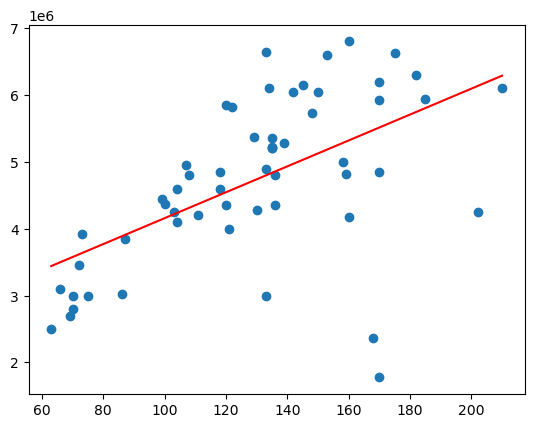

In [4]:
x = df['Living_area']
y = df['Selling_price']


model = np.poly1d(np.polyfit(x,y,1))
line = np.linspace(min(x),max(x),10)
plt.plot(line,model(line),color='red')
plt.scatter(x,y)
plt.show()


#model = LinearRegression().fit(x, y)

1. a)
There were some rows that had incomplete data entries but we did not remove them since they had complete information regarding the selling price and living area which are the 2 parameters we are focused on.
So we preformed no data cleaning.
See plot below.

/tmp/ipykernel_16913/499558288.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


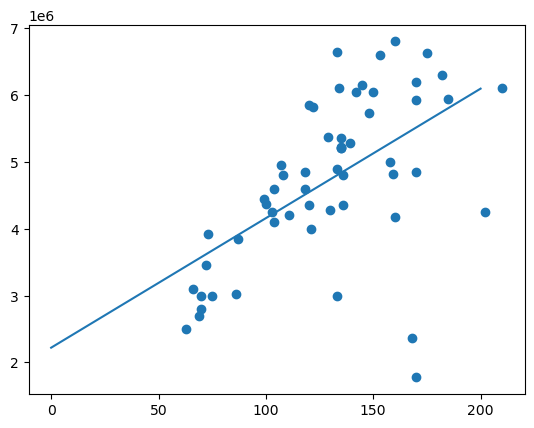

In [5]:
#a) 
x = df['Living_area']
y = df['Selling_price']

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 200, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

1. b)
The slope of the line is: array([19370.13854733])
The intercept of the lilne is: 2220603.243355869
See the calculations below.

In [6]:
#k-value
#Slope of the line:
model.coef_

array([19370.13854733])

In [7]:
# m-value
#Intercept of the line:
model.intercept_

2220603.243355869

1. c)
Predicted selling prices:
For 10m²: 2414304.62882918
For 100m²: 4157617.09808903
For 150m²: 5126124.02545561
For 200m²: 6094630.95282218
For 1000m²: 21590741.79068745

See the calculations below. As well as two plots, the first plot does not contain the selling price of a house with a livingarea of 1000m² otherwise both plots contain all the data points along with the predicted selling prices for the requested lviing areas given in this task. 

In [8]:
#Predicted selling price for 10m²
model.predict([[10]])

array([2414304.62882918])

In [9]:
#Predicted selling price for 100m²
model.predict([[100]])

array([4157617.09808903])

In [10]:
#Predicted selling price for 150m²
model.predict([[150]])

array([5126124.02545561])

In [11]:
#Predicted selling price for 200m²
model.predict([[200]])

array([6094630.95282218])

In [12]:
#Predicted selling price for 1000m²
model.predict([[1000]])

array([21590741.79068745])

/tmp/ipykernel_16913/1383067714.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


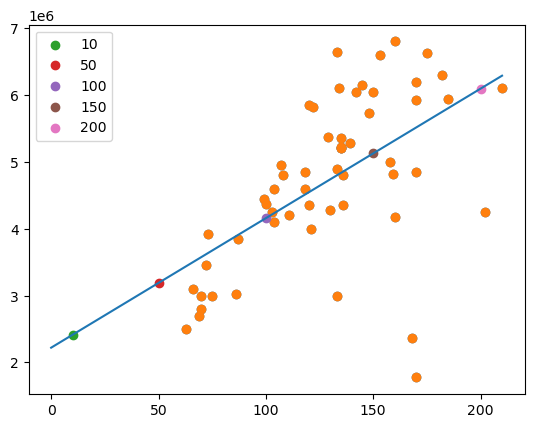

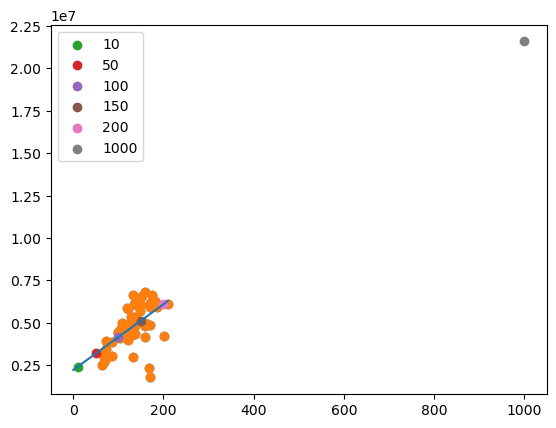

In [13]:
#Linear regression model with the wanted predictions plotted on the line
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 210, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);


plt.scatter(x,y)
plt.scatter(10, model.predict([[10]]), label='10')
plt.scatter(50, model.predict([[50]]), label='50')
plt.scatter(100, model.predict([[100]]), label='100')
plt.scatter(150, model.predict([[150]]), label='150')
plt.scatter(200, model.predict([[200]]), label='200')
plt.legend()
plt.show()
plt.scatter(x, y)
plt.plot(xfit, yfit);

plt.scatter(x,y)
plt.scatter(10, model.predict([[10]]), label='10')
plt.scatter(50, model.predict([[50]]), label='50')
plt.scatter(100, model.predict([[100]]), label='100')
plt.scatter(150, model.predict([[150]]), label='150')
plt.scatter(200, model.predict([[200]]), label='200')
plt.scatter(1000, model.predict([[1000]]), label='1000')
plt.legend()

plt.show()

1. d)
See plot below

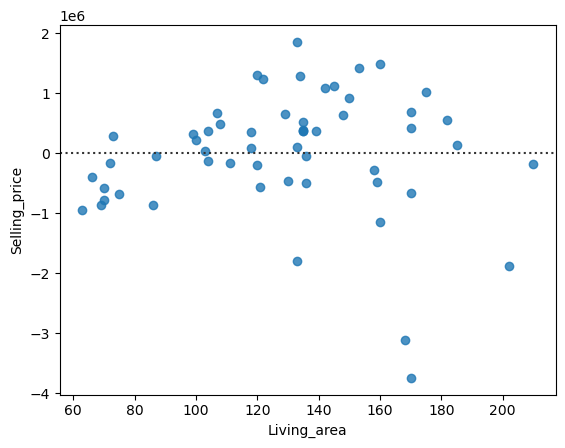

In [78]:
#d) 
#Residual plot
sns.residplot(x='Living_area',y='Selling_price',data=df)
plt.show()


1. e)
We do not think this is a very useful model since the residual plot indicates a high variance. The limitation is that it is not very accurate. To improve both the model and the accuracy we could include more parameters (especially since they exist in the dataframe) such as landsize, and biarea. 
This model should not be used in other areas than Landvetter since the prices and sizes of the living arrangements can depend on multiple factors such as local population, local wealth in the area or distance to the city etc. These factors not included in the dataset has a huge impact on selling price as well, if this data could be obtained it would help alot with creating a more accurate model.


In [18]:
from sklearn.datasets import load_iris
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

2.a)
For visualization we chose to plot all combinations of the columns given in the data set (i.e.Sepal Length, Sepal Width, Petal Length and Petal Width). 

From these 6 plots we observe the following:

Sepal Length and Sepal Width, displays slight negative correlation but not a clear correlation.

Sepal Length and Petal Length, displays a clear positive correlation.

Sepal Length and Petal Width, display a clear positive correlation.

Sepal Width and Petal Length, displays a clear negative correlation.

Sepal Width and Petal Width, displays a clear negative correlation (very similar to Sepal Width and Petal Length).

Petal Length and Petal Width, displays a very clear linear correlation.


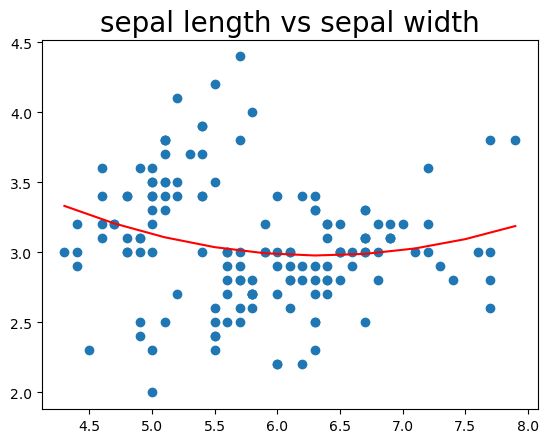

In [19]:
# columns are Sepal Length, Sepal Width, Petal Length and Petal Width.
iris = datasets.load_iris()
x = iris['data'][:,0].tolist()
y = iris['data'][:,1].tolist()
model = np.poly1d(np.polyfit(x, y, 2))

line = np.linspace(min(x), max(x), 10)
plt.plot(line, model(line),color='red')
plt.scatter(x, y)


plt.title(label="Sepal length vs Sepal width",
          fontsize=20
         )
plt.show()

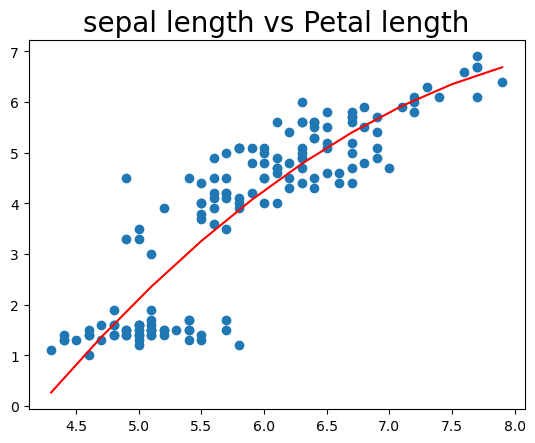

In [20]:

# columns are Sepal Length, Sepal Width, Petal Length and Petal Width.
iris = datasets.load_iris()
x = iris['data'][:,0].tolist()
y = iris['data'][:,2].tolist()
model = np.poly1d(np.polyfit(x, y, 2))

line = np.linspace(min(x), max(x), 10)
plt.plot(line, model(line),color='red')
plt.scatter(x, y)


plt.title(label="Sepal length vs Petal length",
          fontsize=20
         )
plt.show()


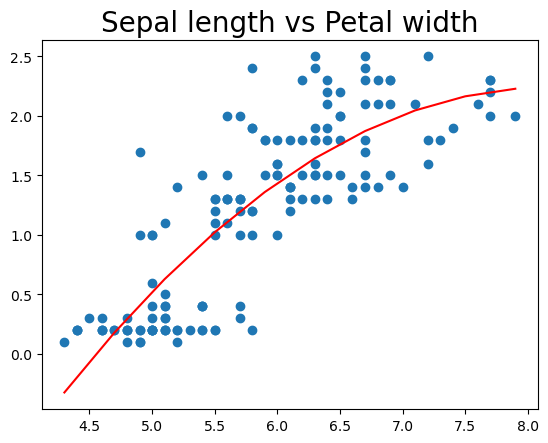

In [34]:
# columns are Sepal Length, Sepal Width, Petal Length and Petal Width.
iris = datasets.load_iris()
x = iris['data'][:,0].tolist()
y = iris['data'][:,3].tolist()
model = np.poly1d(np.polyfit(x, y, 2))

line = np.linspace(min(x), max(x), 10)
plt.plot(line, model(line),color='red')
plt.scatter(x, y)


plt.title(label="Sepal length vs Petal width",
          fontsize=20
         )
plt.show()

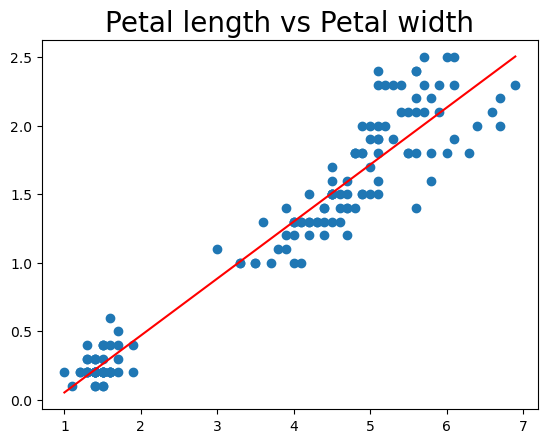

In [40]:
# columns are Sepal Length, Sepal Width, Petal Length and Petal Width.
iris = datasets.load_iris()
x = iris['data'][:,2].tolist()
y = iris['data'][:,3].tolist()
model = np.poly1d(np.polyfit(x, y, 1))

line = np.linspace(min(x), max(x), 10)
plt.plot(line, model(line),color='red')
plt.scatter(x, y)


plt.title(label="Petal length vs Petal width",
          fontsize=20
         )
plt.show()

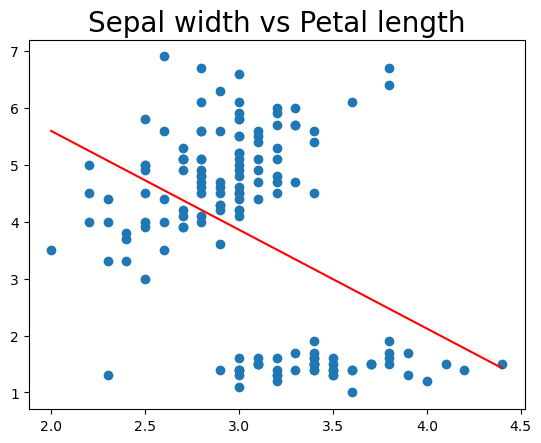

In [38]:
# columns are Sepal Length, Sepal Width, Petal Length and Petal Width.
iris = datasets.load_iris()
x = iris['data'][:,1].tolist()
y = iris['data'][:,2].tolist()
model = np.poly1d(np.polyfit(x, y, 1))

line = np.linspace(min(x), max(x), 10)
plt.plot(line, model(line),color='red')
plt.scatter(x, y)


plt.title(label="Sepal width vs Petal length",
          fontsize=20
         )
plt.show()

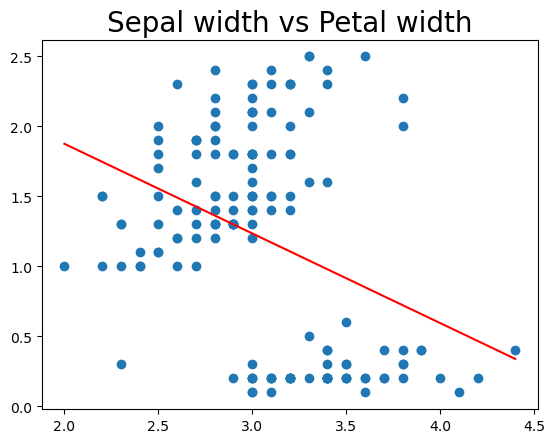

In [39]:
# columns are Sepal Length, Sepal Width, Petal Length and Petal Width.
iris = datasets.load_iris()
x = iris['data'][:,1].tolist()
y = iris['data'][:,3].tolist()
model = np.poly1d(np.polyfit(x, y, 1))

line = np.linspace(min(x), max(x), 10)
plt.plot(line, model(line),color='red')
plt.scatter(x, y)


plt.title(label="Sepal width vs Petal width",
          fontsize=20
         )
plt.show()

2. b)
When discussing below we use the following 4 terms concerning confusion matrix, True position (TP), True negative (TN), False positive (FP), False negative (FN). As well positive predictive value (PPV), true positive rate (TPR)

Our conclusions drawn using a confusion matrix to evaluate the use of logistic regression for the three classes is the following:

For class 0:
The model can accurately predict which flowers belong to class 0. Meaning 100% of all the flowers characterized by class 0 were accurate.
No, FP or FN.
TPR = 100%

For class 1:
Not all flowers actually characterized by class 1 where accurate classified, only 11/16, which is approx 69%, where accurately classified as class 1. The remaining where classified as class 2, resulting in FP in that class. 

For class 2:
All flowers actually characterized as class 2 where correctly classified, however there where 5 flowers that where inaccurately classified as class 2 (FP), when they should be classified as class 1. The PPV is therefore 9/14 (TP/(TP+FP)) which is around 64%.


See below for the calculations and the matrix.

In [111]:
iris = datasets.load_iris()
print("Image Data Shape" , iris.data.shape)
# prints (150,4)
print("Label Data Shape", iris.target.shape)
# prints (150,)

Image Data Shape (150, 4)
Label Data Shape (150,)


In [112]:
# An instance of the Model (with multiclass option "one-versus-the-rest" and a solver called liblinear) 
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
# Training the model on the data
logisticRegr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [113]:
#Predictions on the entire test data
predictions = logisticRegr.predict(x_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2])

In [117]:
# Accuracy method to get accuracy of model
accuracy = logisticRegr.score(x_test, y_test)
print(accuracy)
# accuracy = correct predictions / total number of data points.
# Our accuracy is 0.868421052631579

0.868421052631579


In [115]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]


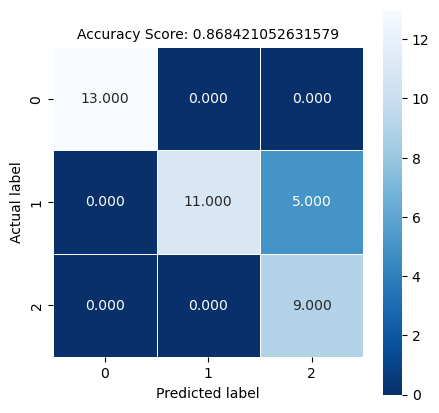

In [116]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig('cm_assignment2_test.png')

2. c)


What will happen when k grows larger for the different cases? Why does this happen? What do you think is the best choice of k? Compute a confusion matrix for the best uniform and distance-based classifiers.

In [155]:
#Load dataset
iris = datasets.load_iris()
print(iris.feature_names)
#prints ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print(iris.target_names)
#prints ['setosa' 'versicolor' 'virginica']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [136]:
# Splitting dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [137]:
#KNN Classifier that assigns uniform weights on all neighbours
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')

#Train the model using the training sets
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [138]:
#KNN Classifier that assigns weights propotional to the inverse of their distance from the query point.
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [150]:
#predicts the class for which each test data in X_test belongs to 
#where each test data in X_test contains of Sepal Length, Sepal Width, Petal Length, Petal Width
y_pred = knn.predict(X_test)
#y_pred
#X_test
# Prints Model accuracy (how often our classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

array([[6.8, 3.2, 5.9, 2.3],
       [5.1, 3.3, 1.7, 0.5],
       [5.5, 2.5, 4. , 1.3],
       [7.4, 2.8, 6.1, 1.9],
       [4.5, 2.3, 1.3, 0.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.3, 3.3, 6. , 2.5],
       [6.4, 2.9, 4.3, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.5, 3. , 5.2, 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [5.7, 2.5, 5. , 2. ],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5.3, 3.7, 1.5, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [6.1, 2.8, 4. , 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 3.8, 1.7, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [5. , 3.5, 1.3, 0.3],
       [6.5, 3. , 5.5, 1.8],
       [6.1, 2.6, 5.6, 1.4],
       [7.3, 2.9, 6.3, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3

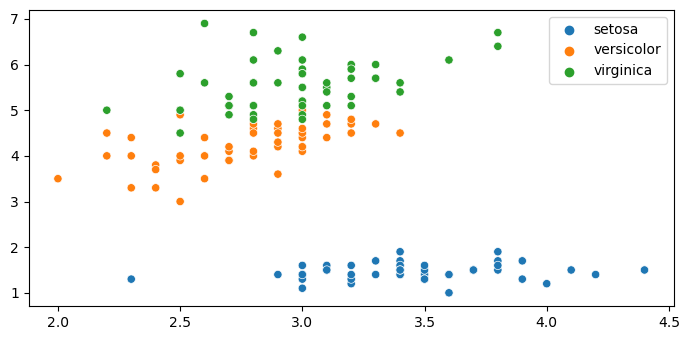

In [168]:
sns.scatterplot(x=iris.data[:,1],y=iris.data[:,2], hue=iris.target_names[y])
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')


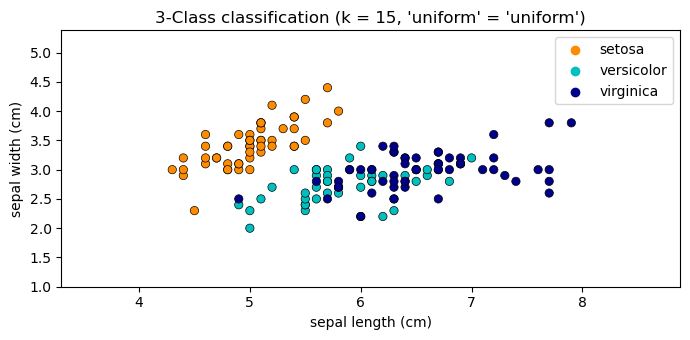

In [158]:

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

kn_neighbors = 15
X = iris.data[:, :2] #2 första kolumnerna
y = iris.target
h = .02

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

#plt.contourf(xx, yy, Z)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
palette=cmap_bold, alpha=1.0, edgecolor="black")


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i, 'uniform' = '%s')"
% (n_neighbors, 'uniform'))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()